In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("df_w_var.csv")

In [3]:
df

,type,1552508_at,1552516_a_at,1552575_a_at,1552807_a_at,1553479_at,1553654_at,1554018_at,1554507_at,1554544_a_at,...,242134_at,242888_at,242931_at,242943_at,243584_at,244163_at,244493_at,244503_at,244751_at,53071_s_at
0,0,5.989892,8.660293,6.891804,7.924462,6.895976,4.827520,4.369720,4.015369,8.396550,...,7.226616,6.705961,8.573175,5.559319,6.382599,3.841604,3.423704,3.627346,6.001562,8.183152
1,0,8.319513,9.980202,6.826210,7.493678,7.775287,6.873171,3.636735,3.204273,8.035201,...,8.765334,6.234970,6.750153,8.727043,6.476319,4.599455,3.214800,4.951005,5.518132,9.191431
2,0,7.261455,8.212629,6.270775,8.045542,8.177457,4.041513,6.366196,4.369383,8.530794,...,6.562527,6.614429,8.047375,7.003226,6.268696,3.411819,3.078852,3.624622,5.927809,9.263549
3,0,5.883377,6.236439,6.029005,8.071778,5.224647,4.879736,4.881586,3.394249,6.981226,...,6.083050,5.891748,5.999268,5.481434,6.353627,5.667723,3.429725,3.859270,5.952769,10.339334
4,0,6.665956,8.035231,7.614323,7.692385,7.442830,5.849879,7.108214,4.431447,7.199892,...,8.006517,6.688329,6.308003,6.349058,6.409389,3.632523,3.294988,3.604101,5.653083,8.723818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,4,6.075908,5.905048,6.747455,8.853288,8.155167,5.292367,6.064310,5.434939,9.029924,...,4.910638,6.648045,10.135311,5.801615,6.885251,4.303553,7.708509,4.638371,6.558369,8.452058
226,4,6.289365,6.627597,7.139963,7.722093,8.383120,5.561882,5.384825,4.745585,9.231302,...,5.404540,7.074175,9.290757,6.366715,7.759719,4.159273,8.530550,6.325966,6.358594,8.143372
227,4,6.619972,6.770995,8.068314,8.444597,9.003737,5.424616,4.354752,4.016580,9.325114,...,6.124667,5.890116,8.597054,5.424454,7.416715,4.104406,7.456869,5.050131,6.831401,8.001837
228,4,6.104033,5.499291,6.727333,8.499996,7.861872,5.555507,5.861994,5.118684,8.772711,...,4.787973,6.357555,10.138709,6.029305,6.779249,4.383912,8.393094,5.769283,6.856103,8.471978


In [4]:
#Count the number of samples of five subtypes.
def count_plot(label, title):
    ax = sns.countplot(x=label)
    for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.title(title)
    plt.show()

In [5]:
x_smote = df.iloc[:,1:]
y_smote = df.iloc[:,0]

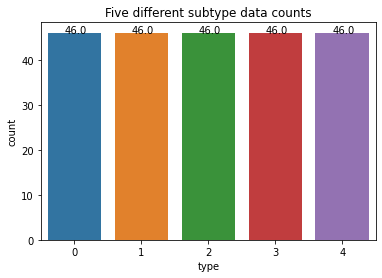

In [6]:
subtype_counts_smote = count_plot(y_smote, "Five different subtype data counts")
subtype_counts_smote

In [7]:
x_smote = np.array(x_smote)
y_smote = np.array(y_smote)

In [8]:
# mean centering
x_smote = np.divide((x_smote-x_smote.mean(0)),x_smote.std(0))

# Classification

In [9]:
# 5-fold Cross Validation
kf = KFold(n_splits=3, shuffle=True)

# four classification methods
model_KNN = KNeighborsClassifier(n_neighbors = 5)
model_LG = LogisticRegression(solver = 'liblinear',penalty = 'l2')
nb = GaussianNB()
rf = RandomForestClassifier()

# store accuracy
KNN_accuracy = []
LG_accuracy = []
nb_accuracy = []
rf_accuracy = []

# store F1
KNN_F1 = []
LG_F1 = []
nb_F1 = []
rf_F1 = []

# store confusion matrix
cm_KNN = []
cm_lg = []
cm_NB = []
cm_RF = []

for train_index, test_index in kf.split(x_smote):
    x_train, x_test = x_smote[train_index], x_smote[test_index]
    y_train, y_test = y_smote[train_index], y_smote[test_index]
    
    #After doing the cross validation, we do the KNN.
    model_KNN.fit(x_train, y_train)
    y_pred_KNN = model_KNN.predict(x_test)
    KNN_accuracy.append(metrics.accuracy_score(y_pred_KNN, y_test) * 100)
    KNN_F1.append(metrics.f1_score(y_pred_KNN, y_test,average='macro') * 100)
    cm_knn_i = metrics.confusion_matrix(y_test, y_pred_KNN)
    cm_KNN.append(cm_knn_i)
    
    #Logistic Regression with L2 penalty
    model_LG.fit(x_train, y_train)
    y_pred_LG = model_LG.predict(x_test)
    LG_accuracy.append(metrics.accuracy_score(y_pred_LG, y_test) * 100)
    LG_F1.append(metrics.f1_score(y_pred_LG, y_test,average='macro') * 100)
    cm_LG_i = metrics.confusion_matrix(y_test, y_pred_LG)
    cm_lg.append(cm_LG_i)
    
    #Naive Bayes
    nb.fit(x_train, y_train)
    y_pred_nb = nb.predict(x_test)
    nb_accuracy.append(nb.score(x_test, y_test) * 100)
    nb_F1.append(metrics.f1_score(y_pred_nb, y_test,average='macro') * 100)
    cm_nb_i = metrics.confusion_matrix(y_test, y_pred_nb)
    cm_NB.append(cm_nb_i)
    
    #Random Forest
    rf.fit(x_train, y_train)
    rf_pred = rf.predict(x_test)
    rf_accuracy.append(metrics.accuracy_score(rf_pred, y_test) * 100)
    rf_F1.append(metrics.f1_score(rf_pred, y_test,average='macro') * 100)
    cm_rf_i = metrics.confusion_matrix(y_test, rf_pred)
    cm_RF.append(cm_rf_i)

In [10]:
# calculate mean accuracy and F1 for each classifier
KNN_acc_score = statistics.mean(KNN_accuracy)
KNN_F1_score = statistics.mean(KNN_F1)

LG_acc_score = statistics.mean(LG_accuracy)
LG_F1_score = statistics.mean(LG_F1)

nb_acc_score = statistics.mean(nb_accuracy)
nb_F1_score = statistics.mean(nb_F1)

rf_acc_score = statistics.mean(rf_accuracy)
rf_F1_score = statistics.mean(rf_F1)

In [19]:
print("-----KNN-----")
print("The accuracy score for KNN is ",KNN_acc_score)
print("The F1 score for KNN is ",KNN_F1_score)
print()

print("-----Logistic Regression-----")
print("The accuracy score for Logistic Regression is ",LG_acc_score)
print("The F1 score for Logistic Regression is ",LG_F1_score)
print()

print("-----Naive Bayes-----")
print("The accuracy score for Naive Bayes is ",nb_acc_score)
print("The F1 score for Naive Bayes is ",nb_F1_score)
print()

print("-----Random Forest-----")
print("The accuracy score for Random Forest is ",rf_acc_score)
print("The F1 score for Random Forest is ",rf_F1_score)
print()

-----KNN-----
The accuracy score for KNN is  94.34381408065619
The F1 score for KNN is  93.8674491594097

-----Logistic Regression-----
The accuracy score for Logistic Regression is  99.13419913419914
The F1 score for Logistic Regression is  99.12478632478633

-----Naive Bayes-----
The accuracy score for Naive Bayes is  96.1038961038961
The F1 score for Naive Bayes is  96.16623709994121

-----Random Forest-----
The accuracy score for Random Forest is  95.65390749601276
The F1 score for Random Forest is  95.57043434572039



In [12]:
# calculate mean confusion matrix
cm_knn = np.mean(cm_KNN,axis = 0)
cm_LG = np.mean(cm_lg,axis = 0)
cm_nb = np.mean(cm_NB,axis = 0)
cm_rf = np.mean(cm_RF,axis = 0)

[Text(0, 0.5, 'ependymoma'),
 Text(0, 1.5, 'glioblastoma'),
 Text(0, 2.5, ' medulloblastoma'),
 Text(0, 3.5, 'pilocytic_astrocytoma'),
 Text(0, 4.5, 'normal')]

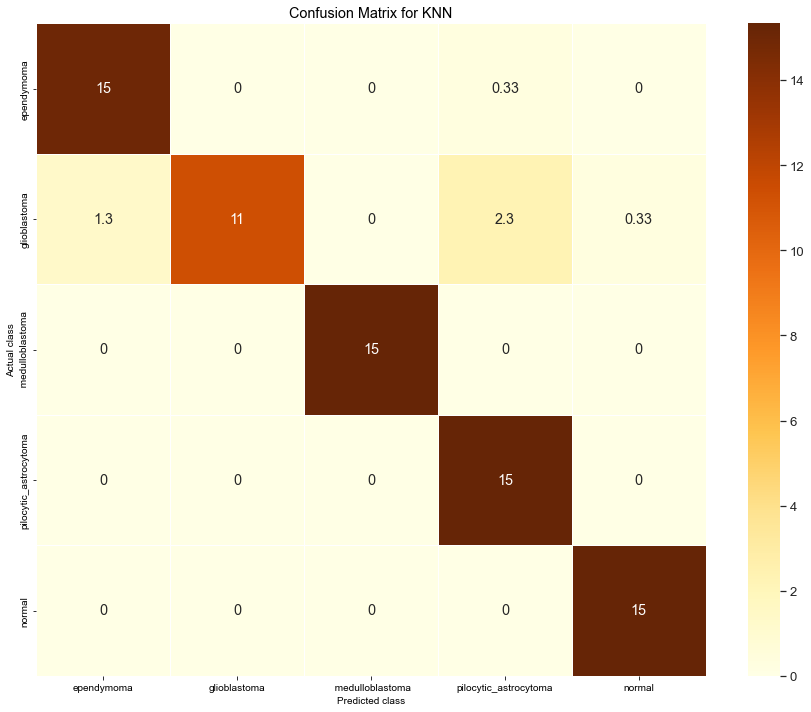

In [13]:
# plot confusion matrix
fig, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1.2)
sns.heatmap(cm_knn, annot = True,linewidths = 1, cmap = "YlOrBr", ax = ax)
cell_type = ['ependymoma', 'glioblastoma',' medulloblastoma', 'pilocytic_astrocytoma','normal']
ax.set_title("Confusion Matrix for KNN")
ax.set_xlabel("Predicted class")
ax.set_ylabel("Actual class")
ax.set_xticklabels(cell_type)
ax.set_yticklabels(cell_type)
#fig.tight_layout()

[Text(0, 0.5, 'ependymoma'),
 Text(0, 1.5, 'glioblastoma'),
 Text(0, 2.5, ' medulloblastoma'),
 Text(0, 3.5, 'pilocytic_astrocytoma'),
 Text(0, 4.5, 'normal')]

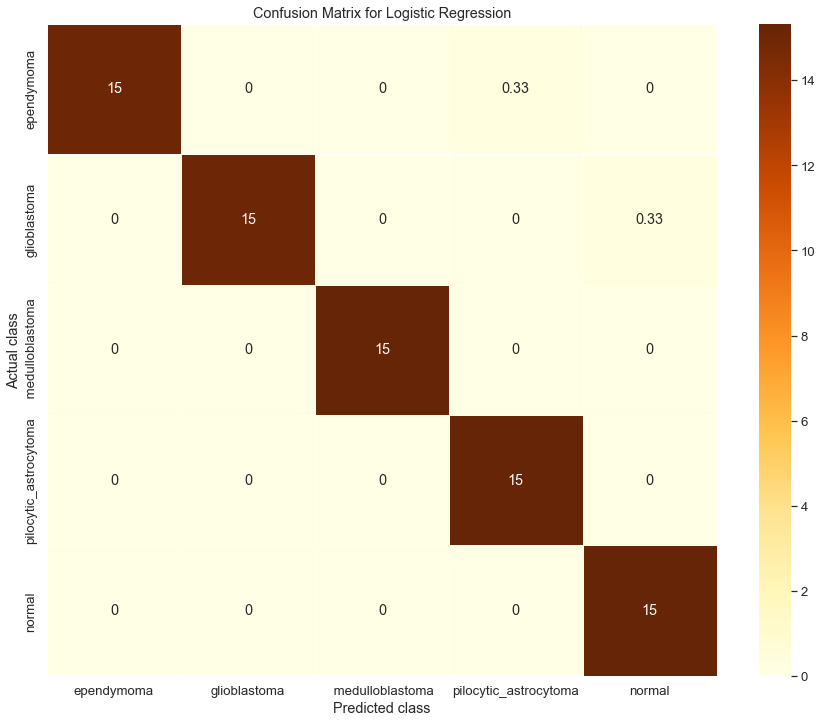

In [14]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1.2)
sns.heatmap(cm_LG, annot = True, linewidths = 1, cmap = "YlOrBr", ax = ax)
cell_type = ['ependymoma', 'glioblastoma',' medulloblastoma', 'pilocytic_astrocytoma','normal']
ax.set_title("Confusion Matrix for Logistic Regression")
ax.set_xlabel("Predicted class")
ax.set_ylabel("Actual class")
ax.set_xticklabels(cell_type)
ax.set_yticklabels(cell_type)

[Text(0, 0.5, 'ependymoma'),
 Text(0, 1.5, 'glioblastoma'),
 Text(0, 2.5, ' medulloblastoma'),
 Text(0, 3.5, 'pilocytic_astrocytoma'),
 Text(0, 4.5, 'normal')]

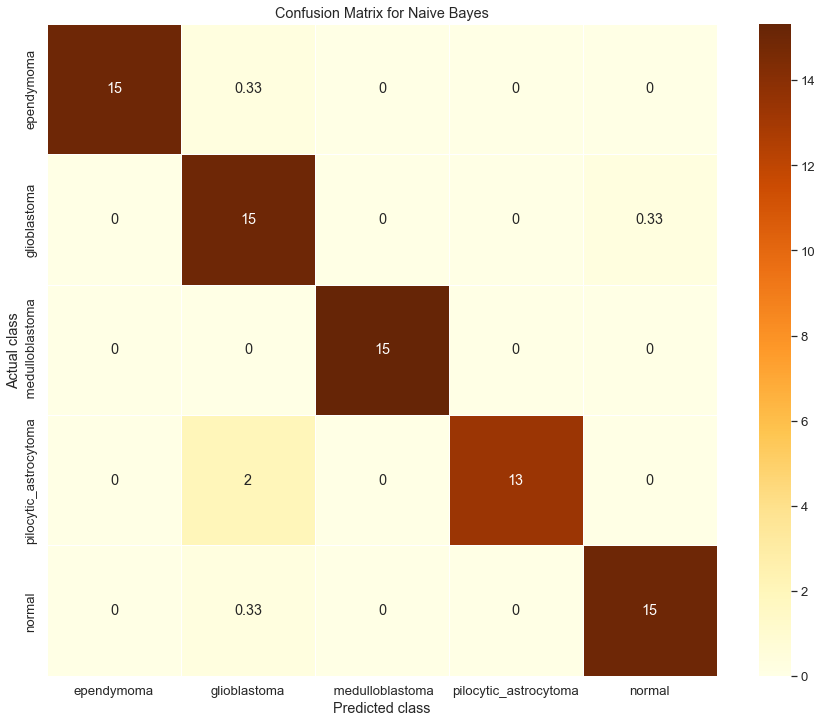

In [15]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1.2)
sns.heatmap(cm_nb, annot = True, linewidths = 1, cmap = "YlOrBr", ax = ax)
cell_type = ['ependymoma', 'glioblastoma',' medulloblastoma', 'pilocytic_astrocytoma','normal']
ax.set_title("Confusion Matrix for Naive Bayes")
ax.set_xlabel("Predicted class")
ax.set_ylabel("Actual class")
ax.set_xticklabels(cell_type)
ax.set_yticklabels(cell_type)

[Text(0, 0.5, 'ependymoma'),
 Text(0, 1.5, 'glioblastoma'),
 Text(0, 2.5, ' medulloblastoma'),
 Text(0, 3.5, 'pilocytic_astrocytoma'),
 Text(0, 4.5, 'normal')]

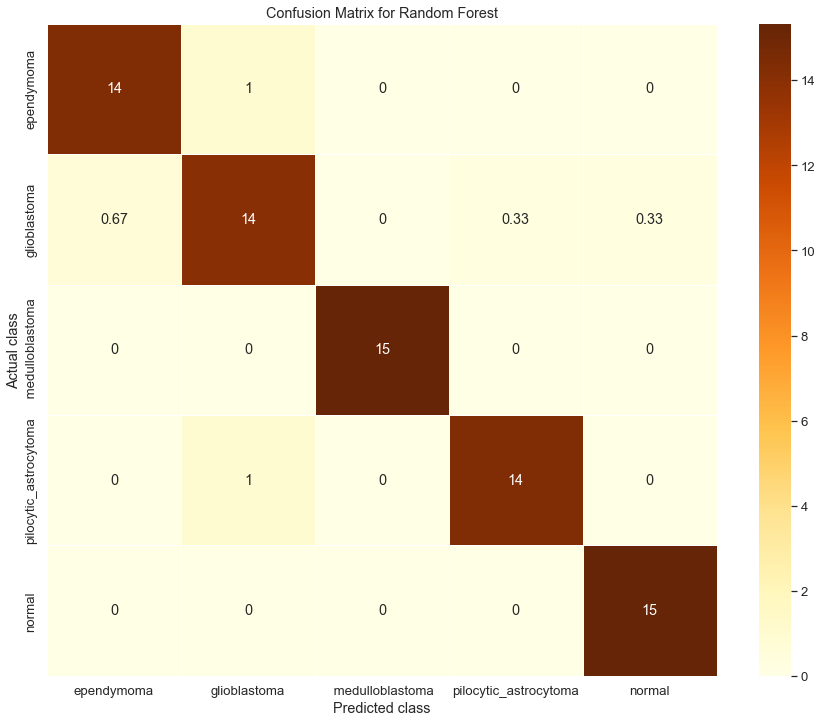

In [16]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1.2)
sns.heatmap(cm_rf, annot = True,linewidths = 1, cmap = "YlOrBr", ax = ax)
cell_type = ['ependymoma', 'glioblastoma',' medulloblastoma', 'pilocytic_astrocytoma','normal']
ax.set_title("Confusion Matrix for Random Forest")
ax.set_xlabel("Predicted class")
ax.set_ylabel("Actual class")
ax.set_xticklabels(cell_type)
ax.set_yticklabels(cell_type)